# Elon musk tweets

In [59]:
import pandas as pd
import numpy as np
import string
import spacy

import matplotlib.pyplot as plt
import matplotlib.pyplot as imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
tweet = pd.read_csv('/content/drive/MyDrive/Colab/Dataset/TextMining/Elon_musk.csv', encoding = 'cp1252')
tweet.head(5)

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


## Text preprocessing

In [3]:
tweet.drop(['Unnamed: 0'], axis= 1, inplace = True)
tweet.columns

Index(['Text'], dtype='object')

In [4]:
# Removing leading and trailing spaces
tweet_list = [x.strip() for x in tweet.Text]
tweet_list[5:10]

['Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [5]:
# Removing non strings
tweet_list = [x for x in tweet_list if x]
tweet_list[1:5]

['@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [8]:
# joining all inidividual text into single string
tweet_text = ' '.join(tweet_list)
tweet_text[0:1000]

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [13]:
# removing twitter handles
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer(strip_handles = True)
tweet_tokens = tknzr.tokenize(tweet_text)
tweet_tokens[0:15]

['I',
 '’',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'next-level',
 '.',
 'Have']

In [16]:
tweet_tokens_text = ' '.join(tweet_tokens)
tweet_tokens_text[0:1000]

'I ’ m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch th

In [18]:
# Removing puntuations
tweet_text = tweet_tokens_text.translate(str.maketrans('', '', string.punctuation))
tweet_text[0:1000]

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway tog

In [20]:
# removing https or urls
import re
no_url_txt = re.sub(r'http\S+', '', tweet_text)
no_url_txt[0:1000]

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well

In [23]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

tweet_tokens = word_tokenize(no_url_txt)
tweet_tokens[0:20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I',
 '’',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'Doge']

In [ ]:
len(tweet_tokens)

21785

In [24]:
# Remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')

my_stop_words = stopwords.words('english')

tweet_nostop = [word for word in tweet_tokens if not word in my_stop_words]
print(tweet_nostop[0:50])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['I', '’', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent']


In [25]:
# normalise the data
# conveting into lowercase
tweet_lower = [x.lower() for x in tweet_nostop]
print(tweet_lower[0:100])

['i', '’', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'it', '’', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', '’', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first']


In [28]:
# stemming 
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stem_tokens = [ps.stem(word) for word in tweet_lower]
stem_tokens[0:20]


['i',
 '’',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great',
 'interview',
 'doge',
 'underestim',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last']

In [30]:
# Lemmatization
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(tweet_lower))
doc[0:100]

i ’ alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it ’ getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account u0001f923 u0001f923 this true power haha any crypto wallet ’ give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first

In [31]:
lemmas = [token.lemma_ for token in doc]
lemmas[0:20]

['i',
 "'",
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last']

In [34]:
clean_tweets = ' '.join(lemmas)
clean_tweets[0:100]

"i ' alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimated congratulat"

## Feature extraction

### Count vectorizer

In [40]:
# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# fitted to count vectorizer i.e. sparse matrix
tweet_cv = cv.fit_transform(lemmas)

tw_lst = list(cv.vocabulary_.items())
tw_lst[0:10] # for viewing purpose converted from dict to list

[('alien', 195),
 ('ray', 2349),
 ('trace', 3014),
 ('cyberpunk', 767),
 ('hdr', 1362),
 ('nextlevel', 1959),
 ('have', 1357),
 ('try', 3044),
 ('great', 1308),
 ('interview', 1555)]

In [42]:
cv.get_feature_names()[100:120]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['74',
 '78',
 '7th',
 '90',
 '9007',
 '922',
 '948',
 '95',
 '99',
 'aber',
 'able',
 'abo',
 'aboard',
 'abort',
 'about',
 'above',
 'absence',
 'absolute',
 'absolutely',
 'absorb']

In [43]:
tweet_cv.toarray()[100:120]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
tweet_cv.toarray().shape

(12589, 3416)

In [45]:
# Count vectorizer with n-grams
cv_ngram_range = CountVectorizer(analyzer = 'word', ngram_range = (1,3), max_features = 100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [51]:
cv_ngram_range.get_feature_names()[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['actually',
 'also',
 'back',
 'big',
 'booster',
 'car',
 'come',
 'complete',
 'cool',
 'could']

In [50]:
bow_matrix_ngram.toarray()[0:20]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### TF-IDF vectorizer

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv_ngram_max_features = TfidfVectorizer(norm='l2', analyzer='word', ngram_range=(1,3), max_features=500)
tfidf_matix_ngram = tfidfv_ngram_max_features.fit_transform(lemmas)

In [56]:
tfidfv_ngram_max_features.get_feature_names()[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10', '100', '13', '20', '2020', '30', '40', '4d', '60', 'able']

In [57]:
tfidf_matix_ngram.toarray()[0:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## WordCloud

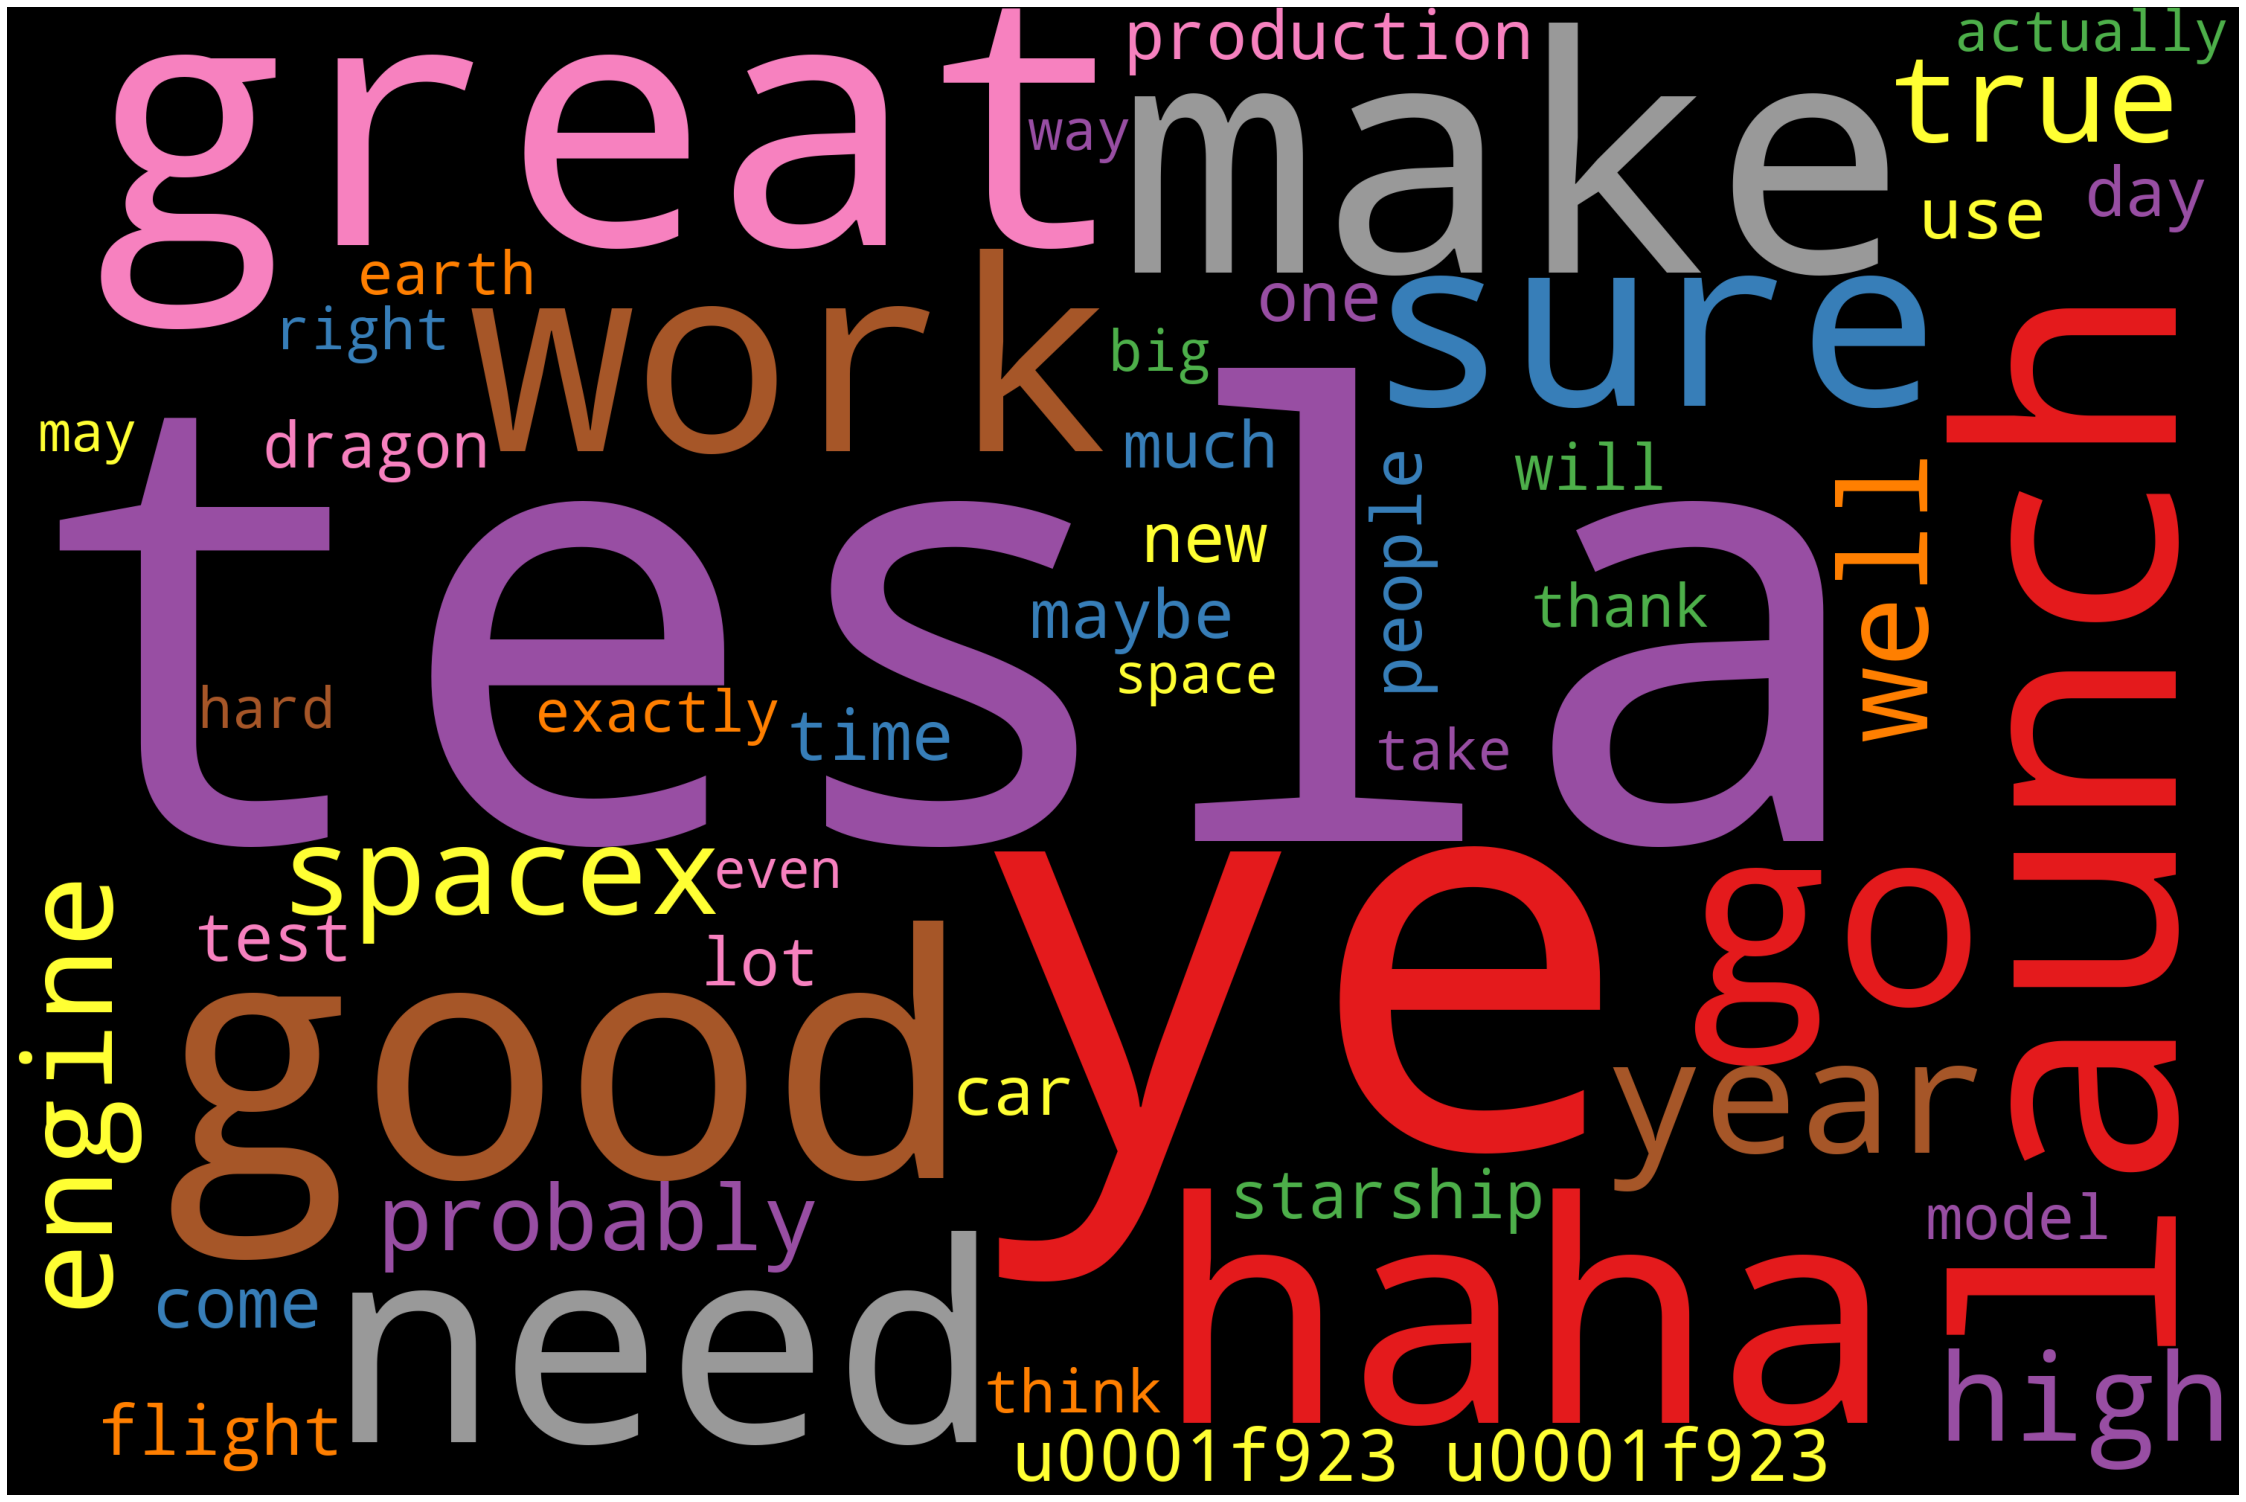

In [60]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [63]:
nlp = spacy.load('en_core_web_sm')

one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [64]:
# Filtering the nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[100:200])

['ship', 'booster', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'u0001f495', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'let', 'doge', 'hodl', 'rainforest', 'come', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'yolt', 'damian', 'thing', 'restaurant', 'get', 'currency', 'earth', 'scratch', 'destiny', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'will', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'isp', 'would', 'seem', 'turbopumpfe', 'raptor', 'mu', 'launch', 'mission', 'collect', 'galaxy', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'would', 'shut', 'engine', 'flameout', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'become', 'meme', 'destroyer', 'may', 'happen', 'sandstorm']


In [67]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word', 'count']
wd_df[0:10] # viewing top ten results


,word,count
0,make,63
1,launch,62
2,need,52
3,year,48
4,work,47
5,would,42
6,go,42
7,come,42
8,time,36
9,engine,36


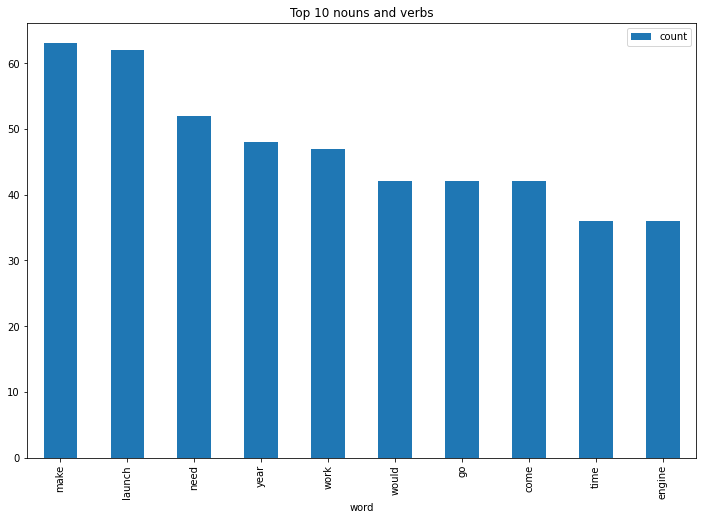

In [66]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x = 'word',figsize = (12,8),title = 'Top 10 nouns and verbs');

## Emotion mining - sentiment analysis

In [69]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(' '.join(tweet_list))
sentences[0:10]

['@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [71]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df.head(5)

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!


In [73]:
# Emotion Lexicon - Affin
affin = pd.read_csv('/content/drive/MyDrive/Colab/Dataset/TextMining/Afinn.csv',sep=',',encoding='Latin-1')
affin.head(4)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2


In [75]:
affinity_scores = affin.set_index('word')['value'].to_dict()

#converting into list for viewing purpose
af_lst = list(affinity_scores.items())
af_lst[0:10]

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3)]

In [77]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text:str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [78]:
# manual testing
calculate_sentiment(text='great')

3

In [81]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value'].head(5)

0    0
1    0
2    3
3    3
4    0
Name: sentiment_value, dtype: int64

In [82]:
# how many words are there in a sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(5)

0    13
1     4
2     4
3    13
4     8
Name: word_count, dtype: int64

In [83]:
sent_df.sort_values(by = 'sentiment_value').head(5)

,sentence,sentiment_value,word_count
640,Very ba… https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
473,"He plays the “poor inventor” card, but was ric...",-5,34
672,"Occasional flights from land are ok, but frequ...",-4,39
910,"It may never pay out, as the stock can’t b… ht...",-4,31


In [84]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.505470
std        2.786384
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [85]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head(5)

,sentence,sentiment_value,word_count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [86]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0].head(5)

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go … @CapybaraSurfer @MattWalla...,4,39


In [87]:
# Adding index cloumn
sent_df['index'] = range(0, len(sent_df))
sent_df.head(4)

,sentence,sentiment_value,word_count,index
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


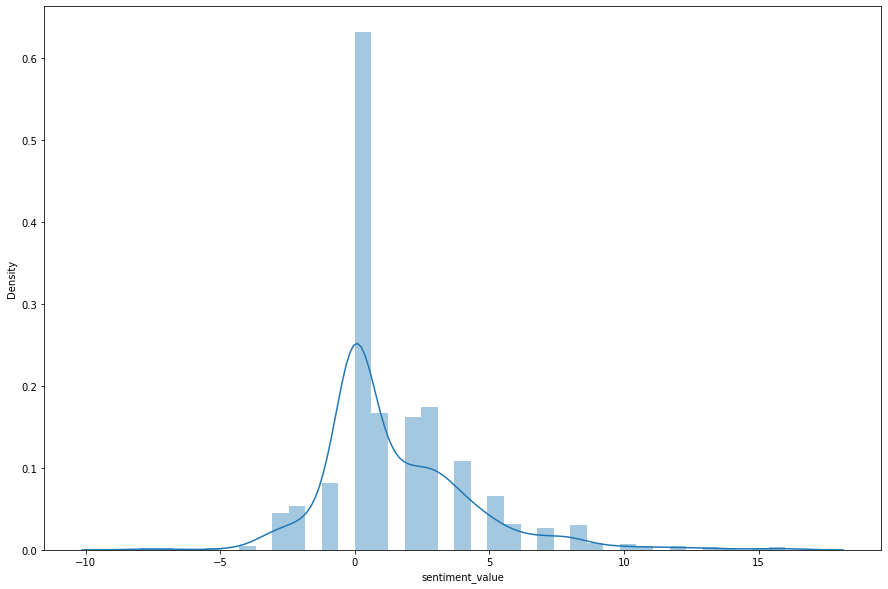

In [88]:
# Plotting the sentiment value for whole review
import seaborn as sns

plt.figure(figsize = (15,10))
sns.distplot(sent_df['sentiment_value'])

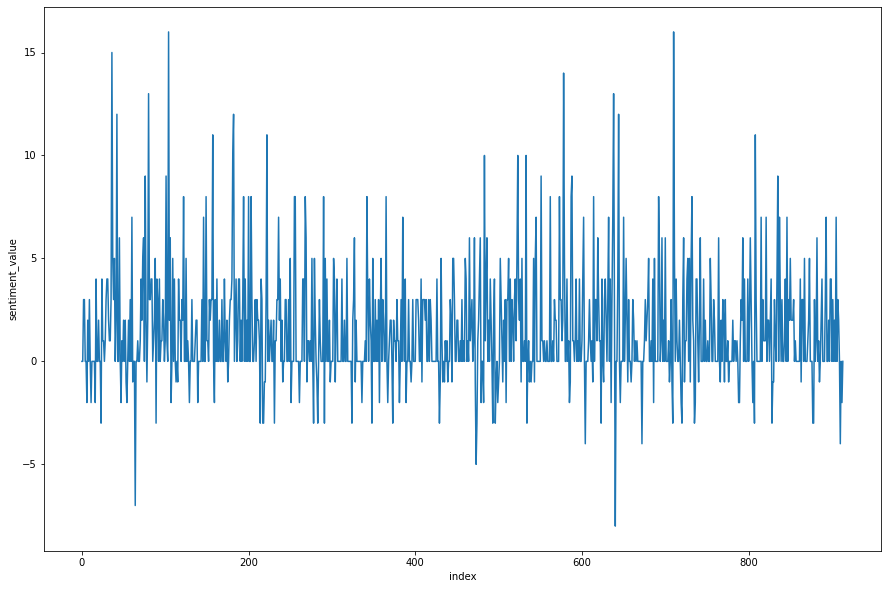

In [89]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize = (15,10))
sns.lineplot(y = 'sentiment_value', x = 'index', data = sent_df)

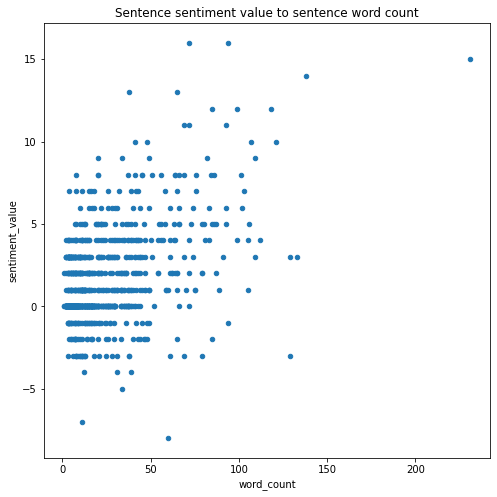

In [90]:
# Correlation analysis
sent_df.plot.scatter(x = 'word_count', y = 'sentiment_value', figsize = (8,8), title = 'Sentence sentiment value to sentence word count')